In [7]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. DATA COLLECTION & ANALYSIS


# Load the data

In [13]:
df = pd.read_csv("Mall_Customers.csv")

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
print("First 5 rows:")
print(df.head(), "\n")

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 



In [21]:
print("Info:")
print(df.info(), "\n")


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 



In [23]:
print("Describe:")
print(df.describe(), "\n")

Describe:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000 



In [25]:
print("Missing values:")
print(df.isnull().sum(), "\n")


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 




# 2. EXPLORATORY DATA ANALYSIS (EDA)


#  Univariate Analysis 

### Age distribution

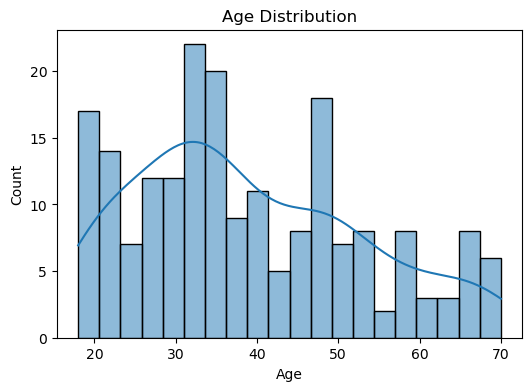

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Annual Income distribution

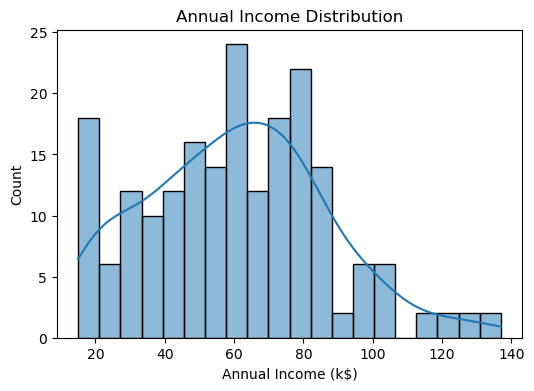

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()


### Spending Score distribution

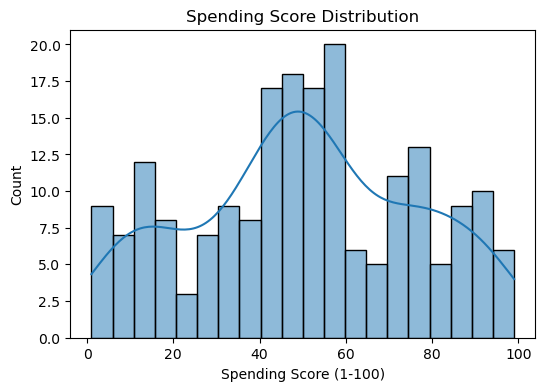

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()


# Bivariate Analysis 

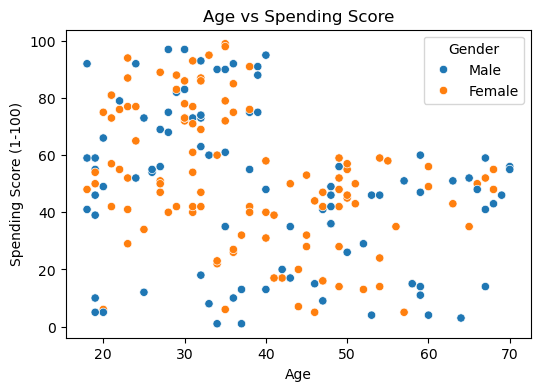

In [39]:
# Age vs Spending Score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

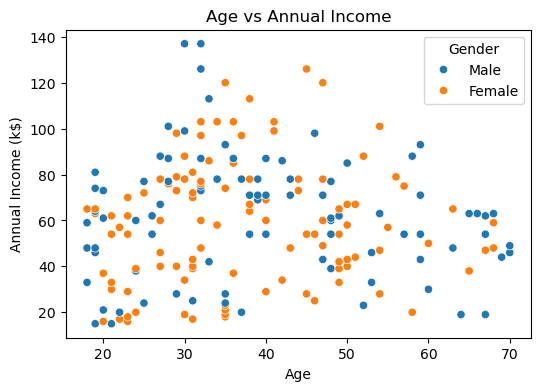

In [41]:
# Age vs Annual Income
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

# 3. FEATURE SELECTION FOR K-MEANS

In [44]:
# We will cluster on Annual Income & Spending Score
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
print("Shape of X (for K-Means):", X.shape)


Shape of X (for K-Means): (200, 2)


# 4. ELBOW METHOD TO FIND K

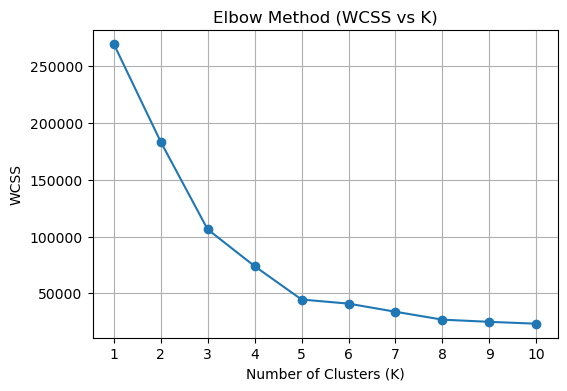

In [47]:
wcss = []

for i in range(1, 11):
    kmeans_temp = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method (WCSS vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [48]:
# From the Elbow graph & known dataset, i choose K = 5
optimal_k = 5
print("Chosen optimal number of clusters:", optimal_k)

Chosen optimal number of clusters: 5


# 5. TRAIN FINAL K-MEANS MODEL

In [52]:
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [54]:
# Add cluster labels to dataframe
df["Cluster"] = y_kmeans

print("Cluster value counts:")
print(df["Cluster"].value_counts().sort_index(), "\n")

Cluster value counts:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64 



In [56]:
# Silhouette Score to check cluster separation
sil_score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", sil_score, "\n")

Silhouette Score: 0.553931997444648 



# 6. VISUALIZING K-MEANS CLUSTERS

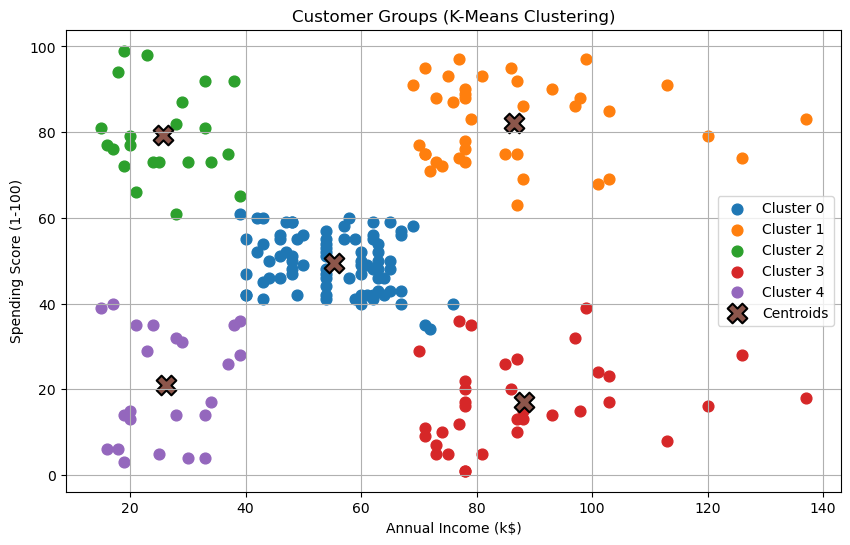

In [59]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, label="Cluster 0")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=60, label="Cluster 1")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, label="Cluster 2")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=60, label="Cluster 3")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=60, label="Cluster 4")



# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroids"
)

plt.title("Customer Groups (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


# 7.PREDICT CLUSTER FOR NEW CUSTOMER (K-MEANS)

In [62]:
#  kmeans was trained on Annual Income, Spending Score
new_customer_kmeans = [[60, 70]]  # Annual Income, Spending Score
cluster_number_kmeans = kmeans.predict(new_customer_kmeans)
print("K-Means: New customer belongs to cluster:", cluster_number_kmeans[0], "\n")


K-Means: New customer belongs to cluster: 0 



# 8. SUPERVISED LEARNING:
##    PREDICTING CLUSTERS USING RANDOM FOREST

In [65]:
# Objective: Use Age, Income, Spending Score to predict the cluster label
X_sup = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
y_sup = df["Cluster"]

In [67]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sup, y_sup,
    test_size=0.2,
    random_state=42,
    stratify=y_sup
)


In [69]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [71]:
# Predict on test set
y_pred = rf_clf.predict(X_test)

In [73]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy (predicting cluster):", accuracy, "\n")



Random Forest Accuracy (predicting cluster): 0.975 



In [75]:
print("Classification Report:")
print(classification_report(y_test, y_pred), "\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         8
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40
 



In [77]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), "\n")

Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  5]] 



In [79]:
# Feature Importance
importances = rf_clf.feature_importances_
for col, imp in zip(X_sup.columns, importances):
    print(f"Feature: {col:25s} | Importance: {imp:.3f}")
print()


Feature: Age                       | Importance: 0.159
Feature: Annual Income (k$)        | Importance: 0.405
Feature: Spending Score (1-100)    | Importance: 0.436



# 9. PREDICTING CLUSTER FOR NEW CUSTOMER (RANDOM FOREST)

In [82]:
# Example new customer for supervised model:
# [Age, Annual Income, Spending Score]
new_customer_rf = np.array([[30, 60, 70]])

rf_cluster = rf_clf.predict(new_customer_rf)
print("Random Forest: New customer belongs to cluster:", rf_cluster[0])

Random Forest: New customer belongs to cluster: 1


C:\Users\gunak\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
